In [1]:
# Importing All necessary Libraries =>

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing the flight booking datasets =>

df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Performing EDA
df.shape

(300153, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df = df.drop(columns=['Unnamed: 0','flight'],axis=1)

In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


<Axes: xlabel='airline', ylabel='price'>

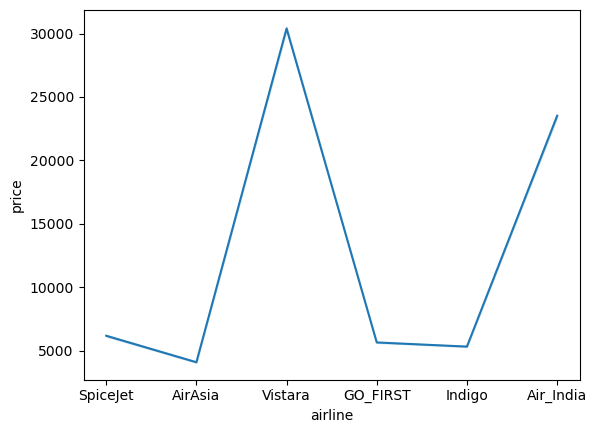

In [7]:
# Let see Airlines price comparision

sns.lineplot(df,x='airline',y='price')

<Axes: xlabel='days_left', ylabel='price'>

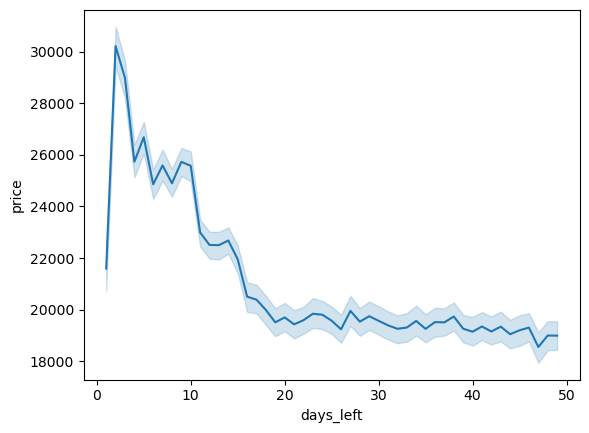

In [8]:
# Let see how the Airlines price increase with duration

sns.lineplot(df,x='days_left',y='price')

In [9]:
df.sample(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
12175,Vistara,Delhi,Afternoon,one,Evening,Bangalore,Economy,4.75,13,9945
118834,Vistara,Bangalore,Evening,one,Morning,Chennai,Economy,15.92,40,4792


In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
sc = StandardScaler()

In [11]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

<Axes: >

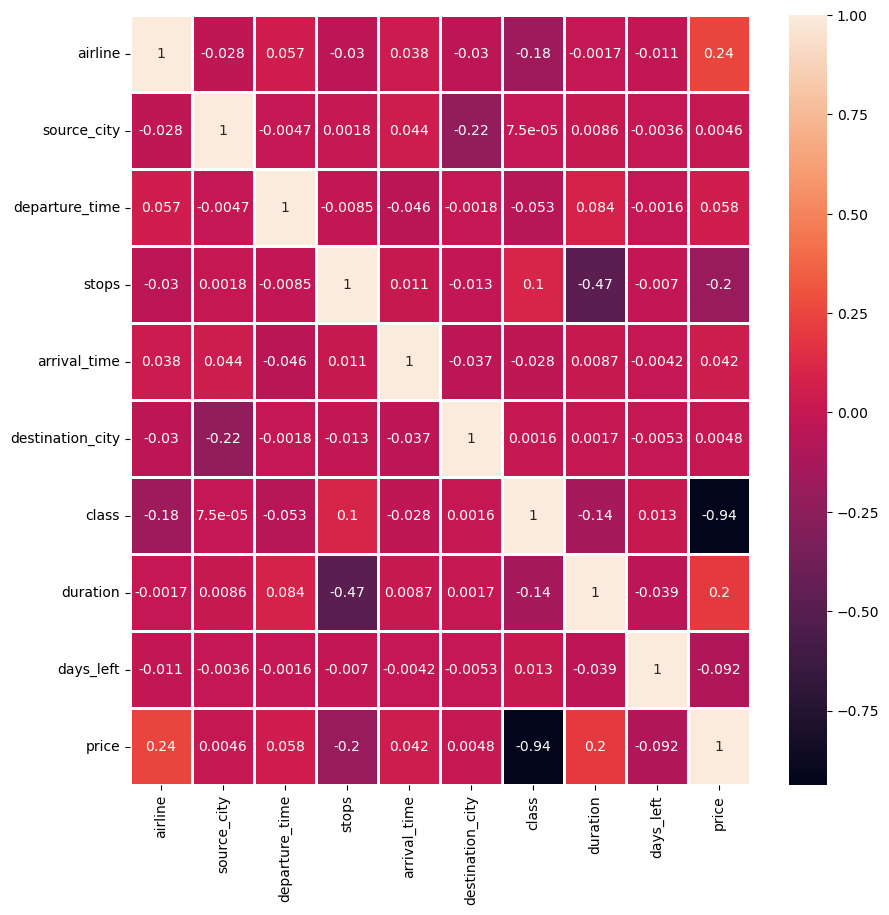

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1,annot=True)

In [13]:
df['airline'].dtype == 'object'

False

In [14]:
# Feature Selection using VIF=>
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
vif_data = pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
print(vif_data)

           features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [17]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.35,random_state=42)

In [18]:
Xtrain=sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression()

In [20]:
ypred = lr.predict(Xtest)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [22]:
print(r2_score(ytest,ypred))
print('MAE =>',mean_absolute_error(ytest,ypred))
print('MSA =>',mean_squared_error(ytest,ypred))
print('MAPE =>',mean_absolute_percentage_error(ytest,ypred))
print('RMSE =>',np.sqrt(mean_squared_error(ytest,ypred)))

print('Lower the MAPE & RMSE ---> Better the Model')

0.9049984800753766
MAE => 4631.216235713639
MSA => 48973829.9620981
MAPE => 0.4381550674660877
RMSE => 6998.130461923249
Lower the MAPE & RMSE ---> Better the Model


In [23]:
# !pip install XGBoost

In [24]:
from xgboost import XGBRegressor

In [25]:
model = XGBRegressor()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

In [26]:
r2_score(ytest,ypred)

0.975640068144674

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
accuracies = cross_val_score(estimator=model,X=Xtrain,y=ytrain,cv=10)
print('Accuracy:{:.2f}%'.format(accuracies.mean()*100))

Accuracy:97.56%


In [29]:
from sklearn.preprocessing import PolynomialFeatures
pn = PolynomialFeatures(degree=2)

In [30]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.35,random_state=42)

In [31]:
X_train = pn.fit_transform(Xtrain)
X_test = pn.transform(Xtest)

In [32]:
lr_pn = LinearRegression()

In [33]:
lr_pn.fit(X_train,ytrain)

LinearRegression()

In [34]:
ypred = lr_pn.predict(X_test)

In [35]:
print(r2_score(ytest,ypred))

0.9370135207939434


In [36]:
print(r2_score(ytest,ypred))
print('MAE =>',mean_absolute_error(ytest,ypred))
print('MSA =>',mean_squared_error(ytest,ypred))
print('MAPE =>',mean_absolute_percentage_error(ytest,ypred))
print('RMSE =>',np.sqrt(mean_squared_error(ytest,ypred)))

print('Lower the MAPE & RMSE ---> Better the Model')

0.9370135207939434
MAE => 3562.66125765069
MSA => 32469892.323787164
MAPE => 0.28846665310176917
RMSE => 5698.235895765211
Lower the MAPE & RMSE ---> Better the Model


In [37]:
# for non-linear model using Support Vector Regressor using rbf

sc_X = StandardScaler()
sc_y = StandardScaler()
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.35,random_state=42)

In [38]:
ytrain = np.reshape(ytrain,(len(ytrain),1))
ytest = np.reshape(ytest,(len(ytest),1))

Xtrain = sc_X.fit_transform(Xtrain)
Xtest = sc_X.transform(Xtest)
ytrain = sc_y.fit_transform(ytrain)
ytest = sc_y.transform(ytest)

In [39]:
# from sklearn.svm import SVR
# model = SVR(kernel='rbf')

In [40]:
# model.fit(Xtrain,ytrain)

In [41]:
# ypred=model.predict(Xtest)

In [42]:
print(r2_score(ytest,ypred))
print('MAE =>',mean_absolute_error(ytest,ypred))
print('MSA =>',mean_squared_error(ytest,ypred))
print('MAPE =>',mean_absolute_percentage_error(ytest,ypred))
print('RMSE =>',np.sqrt(mean_squared_error(ytest,ypred)))

print('Lower the MAPE & RMSE ---> Better the Model')

-920956447.5790277
MAE => 20932.67472286032
MSA => 921833570.8377619
MAPE => 40834.63809701776
RMSE => 30361.71225141563
Lower the MAPE & RMSE ---> Better the Model


In [43]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.35,random_state=42)

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

In [47]:
dt.fit(Xtrain,ytrain)

DecisionTreeRegressor(random_state=42)

In [48]:
ypred = dt.predict(Xtest)

In [49]:
print(r2_score(ytest,ypred))
print('MAE =>',mean_absolute_error(ytest,ypred))
print('MSA =>',mean_squared_error(ytest,ypred))
print('MAPE =>',mean_absolute_percentage_error(ytest,ypred))
print('RMSE =>',np.sqrt(mean_squared_error(ytest,ypred)))

print('Lower the MAPE & RMSE ---> Better the Model')

0.9751049124829562
MAE => 1216.165384786237
MSA => 12833560.809538692
MAPE => 0.07808025361682656
RMSE => 3582.3959593460204
Lower the MAPE & RMSE ---> Better the Model


In [50]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.35,random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,random_state=42)

In [53]:
rf.fit(Xtrain,ytrain)

RandomForestRegressor(n_estimators=10, random_state=42)

In [54]:
ypred = rf.predict(Xtest)

In [55]:
print(r2_score(ytest,ypred))
print('MAE =>',mean_absolute_error(ytest,ypred))
print('MSA =>',mean_squared_error(ytest,ypred))
print('MAPE =>',mean_absolute_percentage_error(ytest,ypred))
print('RMSE =>',np.sqrt(mean_squared_error(ytest,ypred)))

print('Lower the MAPE & RMSE ---> Better the Model')

0.9834517634932725
MAE => 1156.2699537505428
MSA => 8530711.103317901
MAPE => 0.07703391834898426
RMSE => 2920.7381093343342
Lower the MAPE & RMSE ---> Better the Model
